In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import dash
import dash_core_components as dcc
import dash_html_components as html

pd.set_option('float_format', '{:,.2f}'.format)

In [2]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm

In [3]:
df = pd.read_excel('Dolar_Today.xlsx')

In [4]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

df.set_index('Fecha', inplace=True)

In [5]:
#### Forecaste ####

In [6]:
df_forecast = df

df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3231 entries, 2010-06-23 to 2019-10-10
Data columns (total 1 columns):
DolarToday    3231 non-null float64
dtypes: float64(1)
memory usage: 50.5 KB


In [7]:
#### FORECASTING ####

In [8]:
Start_Date_train = "2019-6"
End_Date_train = "2019-8"

df_forecast_train = df_forecast[Start_Date_train:End_Date_train]

df_forecast.columns

Index(['DolarToday'], dtype='object')

In [9]:
Start_Date_test = "2019-8"
End_Date_test = "2019-12"

df_forecast_test = df_forecast[Start_Date_test:End_Date_test]

In [10]:
train_varible = df_forecast_train['DolarToday']
train_index = df_forecast_train.index
train_df = df_forecast_train

test_variable = df_forecast_test['DolarToday']
test_index = df_forecast_test.index
test_df = df_forecast_test

In [11]:
trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

data = [trace1, trace2]

layout = go.Layout(title="Train / Test - Search term")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [12]:
### Naive approach ###

dd= np.asarray(train_varible)

y_hat = test_df.copy()

y_hat['naive'] = dd[len(dd)-1]

trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat['naive'],
                  mode='lines',
                  name='Naive Forecast')




data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Search term")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [13]:
rms_naive = sqrt(mean_squared_error(test_variable, y_hat.naive))

print('RMSE Naive = {}'.format(rms_naive))

RMSE Naive = 794530514.7163997


In [14]:
### Simple Average ###

y_hat_avg = test_df.copy()

y_hat_avg['avg_forecast'] = train_varible.mean()

trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat_avg['avg_forecast'],
                  mode='lines',
                  name='Simple Average')

data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Search term")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [15]:
rms_simple_av = sqrt(mean_squared_error(test_variable, y_hat_avg.avg_forecast))

print('RMSE Simple Average = {}'.format(rms_simple_av))

RMSE Simple Average = 896053216.3779175


In [16]:
### Moving Average ###

y_hat_avg = test_df.copy()

y_hat_avg['moving_avg_forecast'] = train_varible.rolling(24).mean().iloc[-1]

trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat_avg['moving_avg_forecast'],
                  mode='lines',
                  name='Moving Average')

data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Search term")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [17]:
rms_moving_av = sqrt(mean_squared_error(test_variable, y_hat_avg.moving_avg_forecast))

print('RMSE Moving Average = {}'.format(rms_moving_av))

RMSE Moving Average = 440975909.8730919


In [18]:
### Simple Exponential Smoothing ###

y_hat_avg = test_df.copy()

fit2 = SimpleExpSmoothing(np.asarray(train_varible)).fit(smoothing_level=0.6,optimized=False)

y_hat_avg['SES'] = fit2.forecast(len(df_forecast_test))

trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat_avg['SES'],
                  mode='lines',
                  name='SES')

data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Search term")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [19]:
rms_ses = sqrt(mean_squared_error(test_variable, y_hat_avg.SES))

print('RMSE SES = {}'.format(rms_ses))

RMSE SES = 735967947.0647423


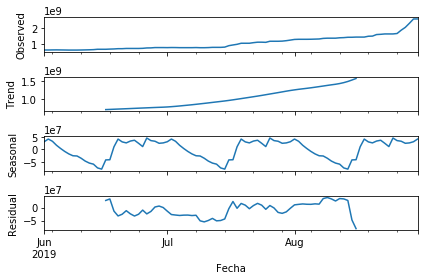

In [20]:
### Holt’s Linear Trend method ###

sm.tsa.seasonal_decompose(train_varible, freq=30).plot()
result = sm.tsa.stattools.adfuller(train_varible)
plt.show()

In [21]:
y_hat_avg = test_df.copy()

fit1 = Holt(np.asarray(train_varible)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)

y_hat_avg['Holt_linear'] = fit1.forecast(len(test_df))

trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat_avg['Holt_linear'],
                  mode='lines',
                  name='Holt_linear')

data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Search term")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [22]:
rms_holt_linear = sqrt(mean_squared_error(test_variable, y_hat_avg.Holt_linear))

print('RMSE Holt Linear = {}'.format(rms_holt_linear))

RMSE Holt Linear = 3297848570.280976


In [23]:
### Holt-Winters Method ###

y_hat_avg = test_df.copy()

fit1 = ExponentialSmoothing(np.asarray(train_varible) ,seasonal_periods=7 ,
                            trend='add', seasonal='add',).fit()

y_hat_avg['Holt_Winter'] = fit1.forecast(len(df_forecast_test))

trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat_avg['Holt_Winter'],
                  mode='lines',
                  name='Holt-Winters')

data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Search term")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [24]:
rms_holt_winters = sqrt(mean_squared_error(test_variable, y_hat_avg.Holt_Winter))

print('RMSE Holt Winters = {}'.format(rms_holt_winters))

RMSE Holt Winters = 6631667028.507651


### ARIMA ###

y_hat_avg = test_df.copy()

fit1 = sm.tsa.statespace.SARIMAX(train_varible, order=(1, 0, 0),seasonal_order=(1,1,2,6)).fit()

y_hat_avg['SARIMA'] = fit1.predict(start=Start_Date_train, end=End_Date_train, dynamic=True, freq=7)

trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat_avg['SARIMA'],
                  mode='lines',
                  name='SARIMA')

data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Search term")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

rms_arima = sqrt(mean_squared_error(test_variable, y_hat_avg.SARIMA))

print('RMSE ARIMA = {}'.format(rms_arima))

In [25]:
print('RMSE Naive = {}'.format(rms_naive))

print('RMSE Simple Average = {}'.format(rms_simple_av))

print('RMSE Moving Average = {}'.format(rms_moving_av))

print('RMSE SES = {}'.format(rms_ses))

print('RMSE Holt Linear = {}'.format(rms_holt_linear))

print('RMSE Holt Winters = {}'.format(rms_holt_winters))

#print('RMSE ARIMA = {}'.format(rms_arima))

RMSE Naive = 794530514.7163997
RMSE Simple Average = 896053216.3779175
RMSE Moving Average = 440975909.8730919
RMSE SES = 735967947.0647423
RMSE Holt Linear = 3297848570.280976
RMSE Holt Winters = 6631667028.507651


In [26]:
#### Moving Averages - Manual ####

In [27]:
Start_Date_ave = "2019-1"
End_Date_ave = "2019-12"

df_ave = df[Start_Date_ave:End_Date_ave]

df_ave.head()

,DolarToday
Fecha,
2019-01-01,"73,029,000.00"
2019-01-02,"78,128,000.00"
2019-01-03,"81,096,000.00"
2019-01-04,"84,124,000.00"
2019-01-05,"84,124,000.00"


In [28]:
rolling_mean = df_ave['DolarToday'].rolling(window=20).mean()
rolling_mean2 = df_ave['DolarToday'].rolling(window=50).mean()


trace1 = go.Scatter(x=df_ave.index,
                    y=df_ave['DolarToday'],
                  mode='lines',
                  name='Dolar Today')

trace2 = go.Scatter(x=df_ave.index,
                    y=rolling_mean,
                  mode='lines',
                  name='20 SMA')

trace3 = go.Scatter(x=df_ave.index,
                    y=rolling_mean2,
                  mode='lines',
                  name='90 SMA')


data = [trace1, trace2,trace3]

layout = go.Layout(title="Basic Moving Average")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [29]:
span1 = 20
span2 = 50

exp1 = df_ave['DolarToday'].ewm(span=span1, adjust=False).mean()
exp2 = df_ave['DolarToday'].ewm(span=span2, adjust=False).mean()

trace1 = go.Scatter(x=df_ave.index,
                    y=df_ave['DolarToday'],
                  mode='lines',
                  name='Dolar Today')

trace2 = go.Scatter(x=df_ave.index,
                    y=exp1,
                  mode='lines',
                  name='Exp {}'.format(span1))

trace3 = go.Scatter(x=df_ave.index,
                    y=exp2,
                  mode='lines',
                  name='Exp {}'.format(span2))


data = [trace1, trace2,trace3]

layout = go.Layout(title="EMA")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)



'temp-plot.html'

In [30]:
df_ave['exe1'] = df_ave['DolarToday'].ewm(span=span1, adjust=False).mean()

df_ave['dif_exe1'] = df_ave['DolarToday'] - df_ave['exe1']

In [31]:
trace1 = go.Scatter(x=df_ave.index,
                    y=df_ave['DolarToday'],
                    mode='lines',
                    name='Dolar Today',
                    marker = {'color':'rgb(16, 173, 58)'})
                                  

trace2 = go.Scatter(x=df_ave.index,
                    y=exp1,
                  mode='lines',
                  name='Exp {}'.format(span1),
                  marker = {'color':'rgb(49,55,254)'},
                  fill='tonexty')

data = [trace1, trace2]

layout = go.Layout(title="Diferencia")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)



'temp-plot.html'

In [32]:
trace1 = go.Bar(x=df_ave.index,
                y=df_ave['dif_exe1'],
                  name='Diferencia',
                  marker = {'color':'rgb(49,55,254)'})

data = [trace1]

layout = go.Layout(title="Diferencia valor observado versus valor media móvil")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)



'temp-plot.html'

In [33]:
span = 50

In [34]:
EMA = df_ave['DolarToday'].ewm(span=span, adjust=False).mean()

In [35]:
ema1 = EMA.ewm(span=span, adjust=False).mean()

ema2 = ema1.ewm(span=span, adjust=False).mean()

DEMA = (ema1 * 2) - ema2

In [36]:
ema2 = EMA.ewm(span=span, adjust=False).mean()

TEMA = ema2.ewm(span=span, adjust=False).mean()

In [37]:
trace1 = go.Scatter(x=df_ave.index,
                    y=df_ave['DolarToday'],
                  mode='lines',
                  name='Dolar Today')

trace2 = go.Scatter(x=df_ave.index,
                    y=EMA,
                  mode='lines',
                  name='EMA span {}'.format(span))

trace3 = go.Scatter(x=df_ave.index,
                    y=DEMA,
                  mode='lines',
                  name='DEMA span {}'.format(span))

trace4 = go.Scatter(x=df_ave.index,
                    y=TEMA,
                  mode='lines',
                  name='TEMA')


data = [trace1, trace2,trace3]

layout = go.Layout(title="EMA / DEMA")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)



'temp-plot.html'

In [38]:
dif_EMA_DEMA = EMA - DEMA

In [39]:
trace1 = go.Bar(x=df_ave.index,
                y=dif_EMA_DEMA,
                  name='Diferencia',
                  marker = {'color':'rgb(49,55,254)'})

data = [trace1]

layout = go.Layout(title="Diferencia entre EMA y DEMA - DolarToday / span = {} días".format(span))

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)


'temp-plot.html'

In [40]:
dif_DT_DEMA = df_ave['DolarToday'] - DEMA

In [41]:
trace1 = go.Bar(x=df_ave.index,
                y=dif_DT_DEMA,
                  name='Diferencia',
                  marker = {'color':'rgb(49,55,254)'})

data = [trace1]

layout = go.Layout(title="Diferencia entre valor observado y DEMA - DolarToday / span = {} días".format(span))

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'